# AIM
Test out whether taking inner product of QAOA analytical formulas correlates with transferability
https://arxiv.org/pdf/1706.02998.pdf

In [57]:
import numpy as np
from math import sin,cos
from math import pi
import numpy as np

import scipy.integrate
from numpy import exp
from math import sqrt

import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

In [18]:
def z_func(x,y, u,v, t):
    '''
    Given gamma (y) and beta(x), calculates energy of subgraph with central nodes having degrees u and v 
    and sharing t triangles
    '''
    return (0.5 + (0.25*sin(4*x)*sin(y)*((cos(y))**u + (cos(y))**v)) - (0.25*((sin(2*x))**2)*((cos(y))**(u+v-2*t)))*(1-(cos(2*y))**(t)))


In [21]:
def max_en(u, v, t):
    '''
    Finds Max energy of a subgraph with central nodes have node degree u,v and having t triangles
    '''
    en = 0
    for x in np.arange(0, pi, 0.01):
        for y in np.arange(0, 2*pi, 0.01):
            test_en = z_func(x,y,u,v,t)
            if test_en>en:
                en = test_en
    return test_en

In [32]:
max_en(0,0,0)

0.5000101460960411

In [79]:
us = []
ts = []
max_ens = []
for u in range(1,10, 1):
    for t in range(0, 1):
        us.append(u)
        ts.append(t)
        max_ens.append(max_en(u, u, t))


In [80]:
len(us)

9

In [91]:
def inner_product(index1, index2, us = us, vs = us, ts= ts, max_ens = max_ens):
    '''
    Given two subgraphs, finds inner product using their QAOA analytical formulas
    '''
    u1,v1,t1, max_1 = us[index1], us[index1], ts[index1], max_ens[index1]
    u2,v2,t2, max_2 = us[index2], us[index2], ts[index2], max_ens[index2]
    f = lambda x, y : (z_func(x,y,u1,v1,t1))*(z_func(x,y,u2,v2,t2))
    g = lambda x : 0
    h = lambda y : pi
    i = scipy.integrate.dblquad(f, 0, 2*pi, g, h)
    return i[0]

In [95]:
def normalize_inner_product(index1, index2):
    '''
    Assuming Index2 is acceptor, normalizes inner product of the two graphs
    '''
    n = inner_product(index1, index2)/inner_product(index2, index2)
#     if n>1:
#         return 1
    return n

In [96]:
mat = np.zeros((len(us), len(us)))
for i in range(len(mat)):
    for j in range(len(mat[i])):
        mat[i][j] = normalize_inner_product(i,j)
        


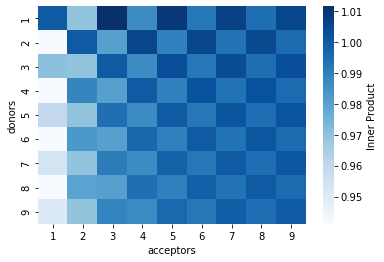

In [97]:
df = DataFrame(mat)  
ax = sns.heatmap(df, annot=False, cmap="Blues",xticklabels=us, yticklabels=us, cbar_kws={'label': 'Inner Product'})
plt.xlabel("acceptors")
plt.ylabel("donors")
#ax.tick_params(left=False, bottom=False) 
plt.show()

In [54]:
max_ens[0]

0.5000101460445691

In [51]:
us

[1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]